# Research Skills: Image Analysis 
## Take-home Assignment - Part 1 
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Blok 3, Spring 2024

Your First Name: Christophe

Your Last Name: Friezas Gonçalves

Your Student ID: 2059012

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

In [1]:
#These are all the necessary imports to run this assignment, other than this course code (assignment and lecture notebooks)
#were used to fulfill the questions

from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.util import random_noise
import time
from scipy import signal
from scipy.fftpack import fftn
import scipy

%matplotlib inline

## 1A: RGB to HSV and back again

1. (3 points) Read in the color image you have been provided. Display the image with an appropriate title.

Text(0.5, 1.0, 'Original Image')

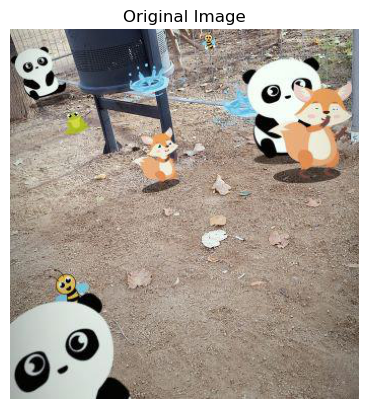

In [2]:
#Your code goes here

im = io.imread('2059012_rgbimage.jpg')

plt.imshow(im)
plt.axis("off")
plt.title("Original Image")


2. (4 points) Convert the image to HSV. Separate the Hue, Saturation and Value channels. Display the 
three channels separately in three subplots and corresponding intensity histograms.

(-0.5, 343.5, 364.5, -0.5)

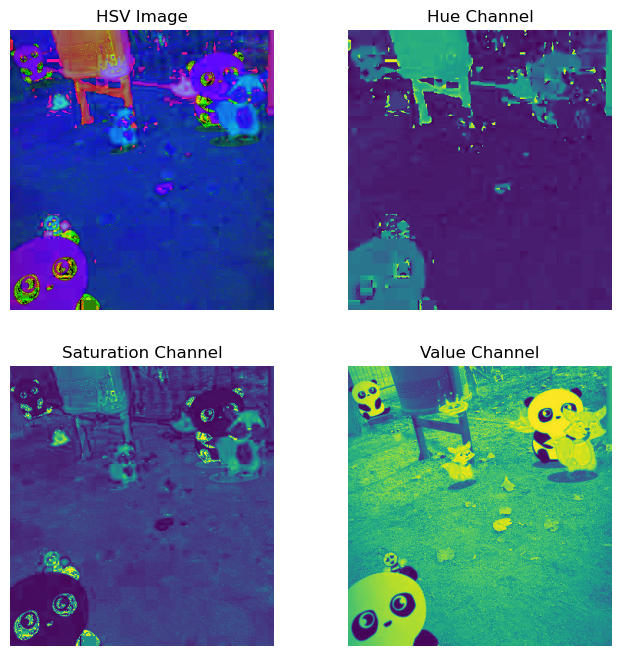

In [9]:
#Your code goes here 
imhsv = color.rgb2hsv(im) 


plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(imhsv); plt.title('HSV Image'); plt.axis('off')
plt.subplot(222); plt.imshow(imhsv[:,:,0]); plt.title('Hue Channel'); plt.axis('off')
plt.subplot(223); plt.imshow(imhsv[:,:,1]); plt.title('Saturation Channel'); plt.axis('off')
plt.subplot(224); plt.imshow(imhsv[:,:,2]); plt.title('Value Channel'); plt.axis('off')

3. (4 points) Perform a histogram equalization on the Hue channel. Display the output Hue channel (as a 
grayscale image) and its corresponding intensity histogram.

Text(0.5, 1.0, 'Hue Channel histogram after equalization')

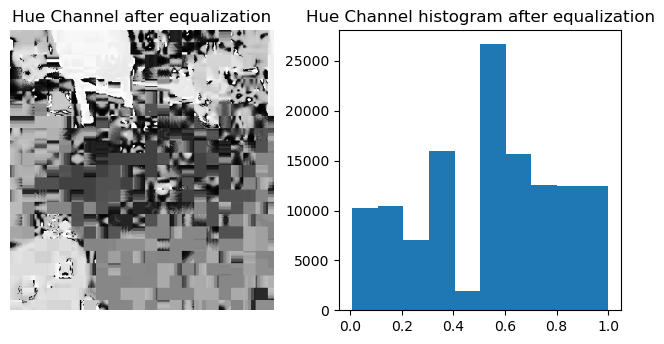

In [4]:
#Your code goes here
eq= exposure.equalize_hist(imhsv[:,:,0])

plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(eq, cmap="gray"); plt.title('Hue Channel after equalization'); plt.axis('off')
plt.subplot(222); plt.hist(eq.ravel()); plt.title('Hue Channel histogram after equalization')

4. (5 points) Create a new HSV array with the modied Hue channel (with the resulting channel from 
Question 3 with the original saturation and original value channels. Convert the new HSV image t 
RGB. Display the orignal RGB (fromuestion  Q1 and the converted RGB image in a subplot.

(-0.5, 343.5, 364.5, -0.5)

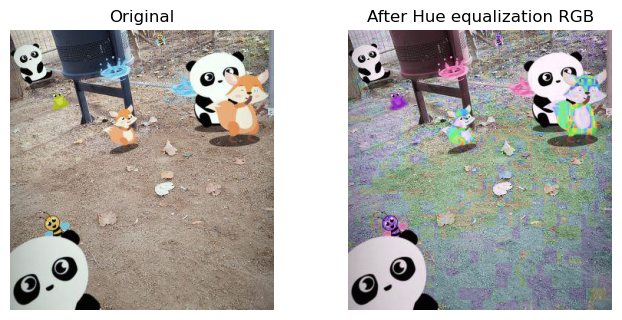

In [5]:
#Your code goes here 
newIm = imhsv
newIm[:,:,0] = eq

newR = color.hsv2rgb(newIm)

plt.figure(figsize=(8,8))
plt.subplot(221); plt.imshow(im); plt.title('Original'); plt.axis('off')
plt.subplot(222); plt.imshow(newR); plt.title('After Hue equalization RGB'); plt.axis('off')

8. (4 points) Why does intensity transformations in the hue channel change the pixel color? 

The Hue channel encodes the true color of each pixel, thus manipluating this channel in any way changes the color of the pixel itself. Value and Saturation only manipulating brightness and white mixture respectively.

## 1B: Image smoothing in the spatial and frequency domain

1. (5 points) Convert the color image which you have been provided to grayscale. Display the image with 
a gray colormap and an appropriate title.

(-0.5, 343.5, 364.5, -0.5)

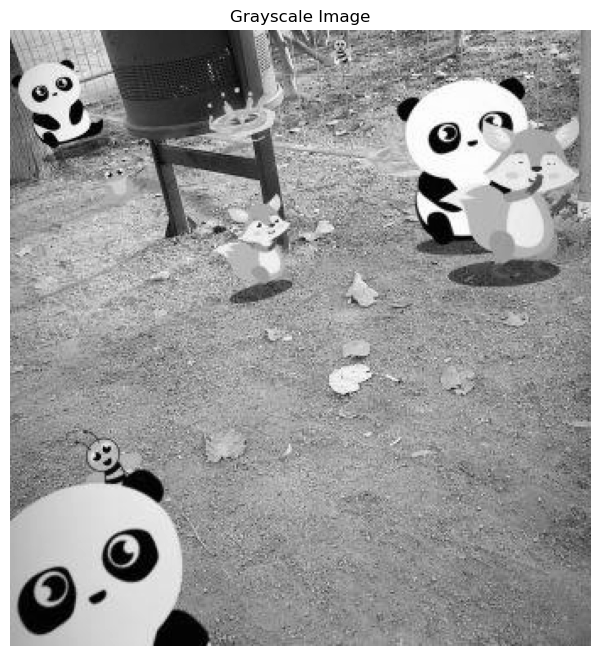

In [6]:
#Your code goes here 

cIm = color.rgb2gray(im)
plt.figure(figsize=(8,8))
plt.imshow(cIm, cmap="gray")
plt.title('Grayscale Image')
plt.axis('off')

2. (2 points) Add 10\% salt and pepper noise to the image.

In [7]:
#Your code goes here 
imSp = random_noise(cIm, seed=42, mode='s&p', amount=0.10)

3. (10 points) Compare the time taken to run Gaussian blur operations in the spatial domain vs the frequency domain the following 7 values of `sigma` - 1,2,4,8,16,32 and 64. Plot the time taken vs sigma for both spatial and frequency domain in the same plot. You can use the "time" module in Python.

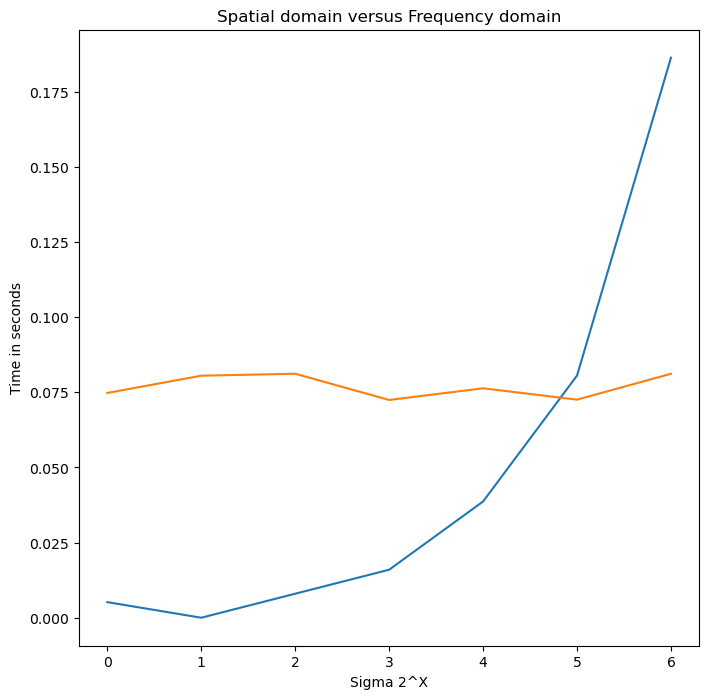

In [10]:
#Your code goes here 
timeDifs = []
timeDiff = []

sigma = [1,2,4,8,16,32,64]
plot = 0

for s in range(len(sigma)):
    start = time.time()
    g = scipy.ndimage.gaussian_filter(imSp,sigma=sigma[s])
    end = time.time()
    
    timeDifs.append(end-start)
    
    gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], sigma[s]), signal.gaussian(im_freq.shape[1], sigma[s]))
    
    start = time.time()
    gSp = signal.fftconvolve(imSp, gauss_kernel, mode = 'full')
    end = time.time()
    
    timeDiff.append(end-start)
    
plt.figure(figsize=(8,8))
plt.plot(timeDifs)
plt.plot(timeDiff)
plt.title("Spatial domain versus Frequency domain")
plt.xlabel("Sigma 2^X")
plt.ylabel("Time in seconds")
plt.show()

4. (3 points) Briefly comment on your plot. When `sigma` is larger, the kernel is larger. Which domain is perfered for for larger kernels? 

As we can observer in the plot, the spatial domain is faster in lower sigmas yet as soon as we cross a sigma higher than 16 increasing by the power of 2 the frequency domain is faster. The frequency domain also stays nearly constant over all sigmas where the spatial domain increases exponentially thus the frequency domain is preferred given speed and consistency.